# Table of Contents
 <p>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

In [12]:
np.shape(X)

(50, 2)

In [14]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [15]:
X2

array([[ 1.51580139,  0.92312811],
       [ 1.58510026,  4.40112734],
       [ 0.13742771,  3.16777298],
       [ 0.56854833,  3.95332789],
       [ 1.70714468,  2.37707464],
       [-0.3148482 ,  4.1335951 ],
       [ 0.26604148,  2.71915015],
       [ 1.19866542,  1.74122504],
       [ 0.86226145,  1.24917702],
       [ 0.9537243 ,  4.64645282],
       [ 1.9765055 ,  0.36688103],
       [ 0.43830172,  4.0161448 ],
       [ 1.01287689,  4.15404025],
       [ 1.65684156,  2.4412893 ],
       [ 1.84086482,  1.53962878],
       [ 2.81480417,  0.96770465],
       [ 1.10022802,  4.60631734],
       [-0.38874607,  5.86440764],
       [ 0.25043139,  4.34534364],
       [ 2.8130691 ,  0.77365559],
       [-1.06612177,  4.8266822 ],
       [ 1.72437234,  0.29969981],
       [ 2.37207289,  0.02321445],
       [ 1.1372926 ,  0.54740762],
       [ 0.56762597,  3.35928158],
       [ 0.27963236,  3.8407076 ],
       [ 1.96050262,  5.26569121],
       [ 1.43933466,  1.32906301],
       [ 2.47031647,

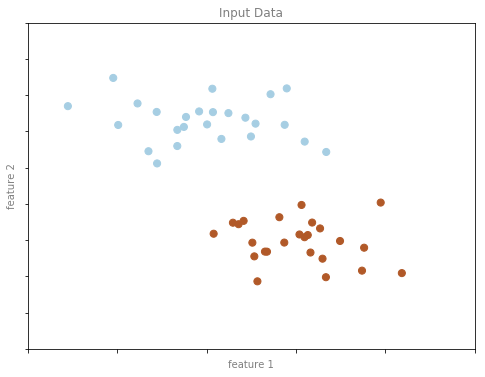

In [5]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('05.01-classification-1.png')

In [16]:
point_style

{'cmap': 'Paired', 's': 50}

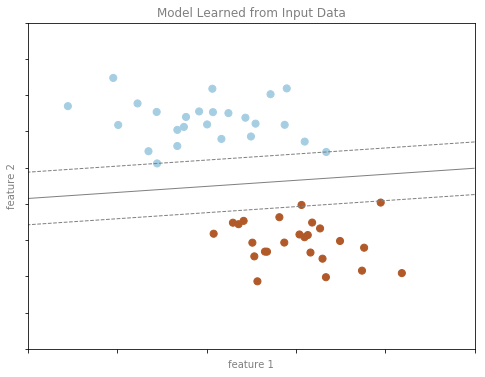

In [8]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('05.01-classification-2.png')

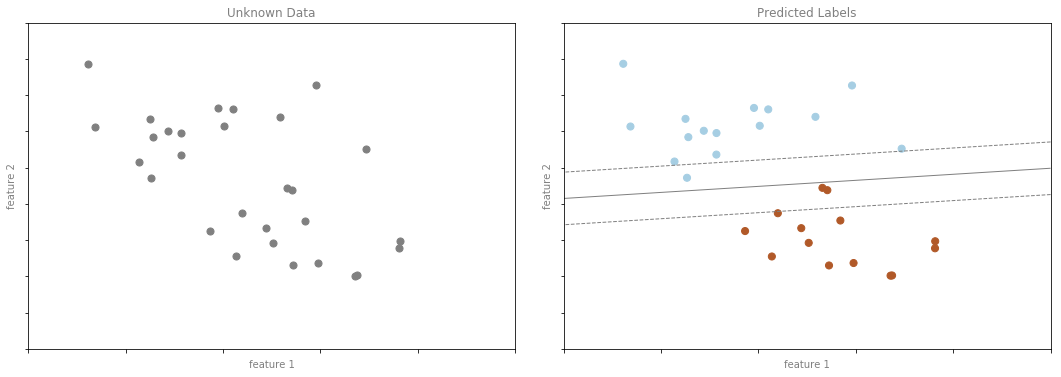

In [9]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('05.01-classification-3.png')